# ITPR

Imports, etc...

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import warnings
import pyrootutils

In [13]:
warnings.filterwarnings("ignore")
root = pyrootutils.setup_root(
    search_from=".",
    indicator=[".git", "pyproject.toml"],
    pythonpath=True,
    dotenv=True,
    cwd=True,
)

In [14]:
from typing import List, Tuple
import pandas as pd
import random
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from itpr import *

In [15]:
from itpr.tables import TABLE

## Table 5

In [25]:
print(f"IPTR (Case 1): {calculate_ITPR(TABLE['id'], TABLE['age_1']):.3f}")
print(f"IPTR (Case 2): {calculate_ITPR(TABLE['id'], TABLE['age_2']):.3f}")
print(f"IPTR (Case 3): {calculate_ITPR(TABLE['id'], TABLE['age_3']):.3f}")
print(f"IPTR (Case 4): {calculate_ITPR(TABLE['id'], TABLE['age_4']):.3f}")
print(f"IPTR (Case 5): {calculate_ITPR(TABLE['id'], TABLE['age_5']):.3f}")

IPTR (Case 1): 0.875
IPTR (Case 2): 0.000
IPTR (Case 3): 0.969
IPTR (Case 4): 0.875
IPTR (Case 5): 0.500


## Figure 1

From Section 5:

<blockquote>
In this section, we provide the experimental results for the ITPR metric, compared to the discrimination rate,mutual information, conditional privacy, maximum information leakage, and entropy l-diversity metrics.

To assess the behavior of the functions of these metrics, we first calculated the metric values for a dataset of 10,000 records, containing two distinct $Y$ attribute values (for example, $y_1 = Male$ and $y_2 = Female$).

We denote by 𝜖 the maximum difference between the number of occurrences of the values of the attribute $Y$:

$ \epsilon = \mathrm{max}_{y_1,y_2 \in \Omega_Y} ( occ(y_1) - occ(y_2) )$

where $\Omega_Y$ denotes the set of distinct values of $Y$ and $occ()$ is a function that returns the number of occurrences of a value. Obviously, the bigger the value of $\epsilon$ is, the smaller the number of occurrences of $y_1$ or $y_2$ will be, resulting in a high re-identification risk.
</blockquote>

The paper does not say anything else about the data used to produce Figure 1...

Ok $Y$ had two possible values, what about $X$?

In [17]:
n_records = 10_000
possible_values = ["m", "f"]
n_values_x = 5 # how many?

In [18]:
def get_itpr_for_diff(diff: int, n_records: int, n_values_x: int = 5) -> Tuple[int, float]:
    """ITPR for difference."""
    frequencies = [n_records - diff, diff]
    eps = frequencies[0] - frequencies[1]
    Y = []
    for y, f in zip(possible_values, frequencies):
        Y += [y] * f
    assert n_records == len(Y)
    Y = pd.Series(Y)
    X = pd.Series([0] * len(Y)) # contant
    X = pd.Series(random.choices(list(range(n_values_x)), k=len(Y)))
    return eps, calculate_ITPR(X, Y)

In [19]:
all_eps = []
all_itpr = []
for diff in tqdm(list(range(1, int(n_records/2), 3))):
    eps, itpr = get_itpr_for_diff(diff, n_records, n_values_x=n_values_x)
    all_eps.append(eps)
    all_itpr.append(itpr)

  0%|          | 0/1667 [00:00<?, ?it/s]

100%|██████████| 1667/1667 [00:22<00:00, 75.63it/s]


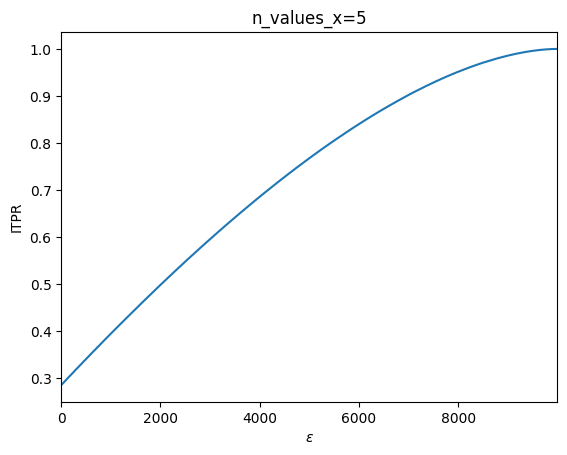

In [20]:
plt.plot(all_eps, all_itpr)
plt.xlim(0, max(all_eps))
plt.xlabel("$\epsilon$")
plt.ylabel("ITPR")
plt.title(f"n_values_x={n_values_x}")
plt.show()